<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 애플리케이션

decorator 함수

In [ ]:
def decorator(func):
    def decorated(a,b):
        if a>=0 and b>=0:
            return func(a,b)
        else:
            raise ValueError('Wrong')
    return decorated

@decorator
def math(a,b):
    if a > 0 and b > 0:
        return a*b

* django에서 로그인 데코레이터를 이미 제공  
* @login_required  
    - 기본적으로 accounts / login으로 넘어간다.  
* @login_required(login_url=reverse_lazy('accountapp:login'))  
    - 추가적인 인자를 넣을 수 있다.
* login_required는 함수에만 적용가능, 클래스안의 메소드에는 적용되지 않는다.  
    - 메소드를 변환해주어야 하는데 장고에서 모두 지원해줌.  
> @method_decorator  메소드로 데코레이터를 바꿔준다.
 @method_decorator(login_required)추가적인 인자를 넣어줌  
 @method_decorator(login_required, 'get') get메소드에 적용




In [ ]:
# gsweb\accountapp\decorators.py 파일 생성
from django.contrib.auth.models import User
from django.http import HttpResponseForbidden


def account_ownership_required(func):
    def decorated(request, *args, **kwargs):
        target_user = User.objects.get(pk=kwargs['pk'])
        if target_user == request.user:
            return func(request, *args, **kwargs)
        else:
            return HttpResponseForbidden()
    return decorated

In [ ]:
# gsweb\accountapp\views.py
has_ownership = [login_required, account_ownership_required]    #로그인이 되었는지, target_user와 유저가 같은 사람인지 확인, decorator함수 이요

@method_decorator(has_ownership, 'get')
@method_decorator(has_ownership, 'post')
class AccountUpdateView(UpdateView):
    model = User
    form_class = AccountCreationForm
    context_object_name = 'target_user'
    success_url = reverse_lazy('accountapp:hello_world')
    template_name = 'accountapp/update.html'

@method_decorator(has_ownership, 'get')
@method_decorator(has_ownership, 'post')
class AccountDeleteView(DeleteView):
    model = User
    context_object_name = 'target_user'
    success_url = reverse_lazy('accountapp:hello_world')
    template_name = 'accountapp/delete.html'


In [ ]:
#terminal 창
python manage.py createsuperuser
hyeon
hyeon@admin.com
#비밀번호입력하고 http://127.0.0.1:8000/admin/로 접속하면 관리창이 뜬다. 

# 2. 알고리즘

In [ ]:
def insertion_sort(n_list):
  i=0
  while i != len(n_list)-1:
    if n_list[i] != min(n_list[i:]):
      n_list.append(n_list[i])
      n_list.pop(i)
    else:
      i+=1
  return n_list

def selection_sort(n_list):  
  m_list=[]
  while len(n_list)>0:
    mm=min(n_list)
    m_list.append(mm)
    n_list.remove(mm)
  return m_list

def bubble_sort(n_list):
  for i in range(len(n_list)-1):
    if n_list[i] > n_list[i+1]:
      n_list[i+1],n_list[i]=n_list[i],n_list[i+1]
  return n_list

#-------------------------------------------------

n = int(input())
num_list = []

for _ in range(n):
    num = int(input())
    num_list.append(num)

# insertion_sorted_list = insertion_sort(num_list)
# print(" ".join(map(str, insertion_sorted_list)))

selection_sorted_list = selection_sort(num_list)
print(" ".join(map(str, selection_sorted_list)))

# bubble_sorted_list = bubble_sort(num_list)
# print(" ".join(map(str, bubble_sorted_list)))

5
3
3
3
1
7
1 3 3 3 7


# 3. 딥러닝 & 강화학습

210721.ipynb

# 4. 머신러닝

## Linear Classifier (선형분류)
- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)
> ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b > 0 <br>
> Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교

- 이진 선형 분류기는 선, 평면, 초평면을 이용하여 2개의 클래스를 구분하는 분류기

경사하강법(Gradient Descent) 최적화 알고리즘을 사용하여 선형 모델을 작성

[SGDClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

```
SGDClassifier(alpha, average, class_weight, epsilon, eta0, fit_intercept, l1_ratio, learning_rat, loss, max_iter, n_iter, n_jobs, penalty, power_t, random_state, shuffle, tol, verbose, warm_start)
```
확률적 경사하강법(SGD, Stochastic Gradient Descent)을 이용하여 선형모델을 구현

- lossstr : 손실함수 (default='hinge')
- penalty : {'l2', 'l1', 'elasticnet'}, default='l2'
- alpha : 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default=True)
- max_iter : 계산에 사용할 작업 수 (default=1000)
- tol : 정밀도
- shuffle : 에포크 후에 트레이닝 데이터를 섞는 유무 (default=True)
- epsilon : 손실 함수에서의 엡실론, 엡실론이 작은 경우, 현재 예측과 올바른 레이블 간의 차이가 임계 값보다 작으면 무시 (default=0.1)
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- random_state : 난수 seed 설정
- learning_rate : 학습속도 (default='optimal')
- eta0 : 초기 학습속도 (default=0.0)
- power_t : 역 스케일링 학습률 (default=0.5)
- early_stopping : 유효성 검사 점수가 향상되지 않을 때 조기 중지여부 (default=False)
- validation_fraction : 조기 중지를위한 검증 세트로 설정할 교육 데이터의 비율 (default=0.1)
- n_iter_no_change : 조기중지 전 반복횟수 (default=5)
- class_weight : 클래스와 관련된 가중치 {class_label: weight} or “balanced”, default=None
- warm_start : 초기화 유무 (default=False)
- average : True로 설정하면 모든 업데이트에 대한 평균 SGD 가중치를 계산하고 결과를 coef_속성에 저장 (default=False)


#### LinearClassifier 실습 01

붓꽃 데이터 셋에 선형분류 적용

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()
iris.data.shape

(150, 4)

In [ ]:
X = iris.data
y = iris.target
X2 = X[:,:2]    #꽃받침의 길이와 넓이

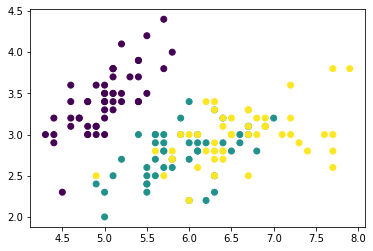

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X2[:, 0], X2[:, 1], c=y)

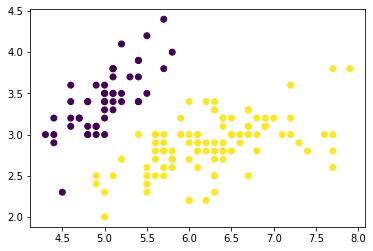

In [ ]:
y2 = y.copy()
y2[y2==2]=1
plt.scatter(X2[:, 0], X2[:, 1], c=y2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2,
                                                    test_size=0.5, random_state=0)
X_train.shape

(75, 2)

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([[ 107.75047259, -153.43415249]]), array([-96.16214183]))

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9866666666666667
1.0


(2.0, 4.5)

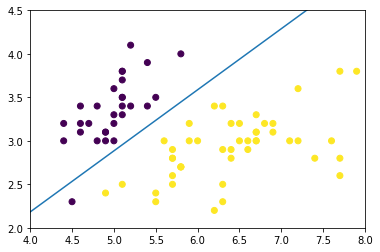

In [ ]:
import numpy as np

w0 = model.coef_[0,0]
w1 = model.coef_[0,1]
b = model.intercept_

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
x0 = np.linspace(4, 8, 50)
x1 = -(w0 * x0 + b) / w1        # w0 * x0 + w1 * x1 + b
plt.plot(x0, x1)
plt.xlim(4,8)
plt.ylim(2,4.5)

#### 4개 속성 모두 이용

세가지 꽃 구분

In [ ]:
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

model = SGDClassifier(random_state=0).fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9666666666666667
1.0


In [ ]:
model.coef_, model.intercept_   #선형분류 3번 동작

(array([[  18.88718734,   43.38948443,  -68.40224604,  -30.11740684],
        [  12.60090569,  -82.10277614,   30.51781847,  -94.50679268],
        [ -93.20829781, -110.82693947,  161.69366297,  148.90593919]]),
 array([  19.55776194,  150.8004204 , -157.17647472]))

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 26.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=76f3e504d5db053bef95d8a972c79022eb6362d07d045370f25441ad978d6459
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## Logistic Regression
선형 회귀로 풀리지 않는 문제 -> 독립변수와 종속변수가 비선형 관계인 경우

 <img src="https://www.geogebra.org/resource/SYzqYk7Y/xIOqFXlBGbAVa8OG/material-SYzqYk7Y.png" alt="비선형1" width="40%" />

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Polynomialdeg5.svg/1200px-Polynomialdeg5.svg.png" alt="비선형2" width="40%" />

공부시간과 합격률의 관계 -> 연속적으로 변하는 공부시간의 결과에 대해 “합격했다” 또는
“합격하지 않았다?”의 결과만 필요  
분류방법 1 -> 선형분류

더 나은 분류 방법은?

- 1958년 D.R.Cox가 제안한 확률 모델로 <font  color=yellow>독립변수의 선형 결합을 이용하여 종속변수 (사건의 발생 가능성)을 예측</font>하는데 사용되는 통계 기법 
 - 종속 변수가 <font  color=yellow>범주형 데이터를 대상</font> -> 분류

- 선형 회귀는 독립변수 x가 변화할 때 종속변수 y가 어떻게 변하는 지 예측하는 것
- 선형 회귀에서 x와 y의 범위 : [-∞, ∞]

- 연속적으로 변하는 2개의 결과만을 확인하는 경우
 - 조사회수가 많아지면 종속 변수 y는 확률로 표현됨
 - 독립변수의 범위는 [-∞, ∞], 종속변수의 범위는 [0, 1]
 - 선형회귀를 적용하면 종속변수의 값 범위를 넘어가는 문제가 발생 
 - 예측정확도 하락 
 - <font  color=yellow>로지스틱 모형</font> 적용

로지스틱 회귀는 선형 회귀 분석과 유사하지만 종속 변수(y)가 범주형 데이터를 대상으로 하며, 입력 데이터(x)가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류모델 기법으로 사용

합격을 1, 불합격을 0으로 하는 1과 0사이의 직선은 그리기 어렵움
 - 참(1)과 거짓(0) 사이를 구분하는 S자 형태의 곡선이면 편리

로지스틱 회귀는 선형 회귀와 마찬가지로 적절한 선을 그려가는 과정

시그모이드 함수 e(자연상수)는 무리수 값 2.71828...
 - 파이처럼 상수로 고정된 값


#### 로지스틱 함수 (sigmoid 함수)
오즈 (odds) : 성공확률이 실패확률에 비해 몇 배 높은가를 나타냄, 범위 [0, 1]

> \\( odds=\frac { p(y) }{ 1-p(y) }  \\)

1.   항목 추가
2.   항목 추가



로짓 변환 : 오즈에 자연로그를 취한 것으로 입력 값의 범위가 [0, 1] 일 때 출력 값의 범위를 [-∞, ∞]
로 조정

> \\( \log _{ e } {\frac { p(y) }{ 1-p(y) }} =\ln { \frac { p(y) }{ 1-p(y) }  }  \\)

로지스틱 함수 (sigmoid 함수) : 독립변수 x가 어느 숫자이든 상관없이 종속 변수의 값의 범위가 항
상 [0, 1] 범위에 있도록 함

> \\( \ln { \frac { p(y) }{ 1-p(y) }  }  = z  \\) <br>

> -> \\(  \frac { p(y) }{ 1-p(y) }   = { e }^{ z  }  \\) <br>

> -> $ \\ \begin{align}
p & = \frac {  { e }^{ z  }  }{ 1 +  { e }^{ z  }  } \\
& = \frac {  1  }{ 1 +  { e }^{(- z)  }  } 
\end{align} \\ $

#### 로지스틱 회귀 (Logistic Regression)

- 간단하면서도 파라미터의 수가 적어서 빠르게 예측
 - 다른 알고리즘과의 비교 기준점으로 사용
- 로지스틱 함수를 사용하여 확률을 추정하며 2 클래스 및 다중 클래스 분류를 위한 강력한 통계 방법으로 빠르고 단순
- 직선 대신 S 모양 곡선을 사용한다는 사실 때문에 데이터를 그룹으로 나누는 데 적합
- 용도 : 신용 점수, 마케팅 캠페인의 성공률 측정, 특정 제품의 매출 예측률, 특정 날에 지진이 발생할 확률 등

- 선형 회귀 방식을 분류에 적용한 알고리즘 (선형 회귀 계열)

- Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교
- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)

- 이 규칙은 Classifier에 쓰이는 모든 Linear model에서 동일
- 가장 널리 알려진 두 개의 linear classifier algorithm
  1. Logistic Regression
  1. Support Vector Classifier의 Linear SVC

[LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
```
LogisticRegression(penalty, dual, tol, C, fit_intercept, intercept_scaling, class_weight, random_state, solver, max_iter, multi_class, verbose, warm_start, n_jobs, l1_ratio)
```
- <font  color=yellow> penalty : 규제에 사용 된 기준을 지정 (l1, l2, elasticnet, none) – default : l2 </font>
- dual : 이중 또는 초기 공식
- tol : 정밀도
- <font  color=yellow> C : 규제 강도 </font>
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- random_state : 난수 seed 설정
- solver : 최적화 문제에 사용하는 알고리즘
- max_iter : 계산에 사용할 작업 수
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- verbose : 동작 과정에 대한 출력 메시지
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- <font  color=yellow> l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) </font>

#### LogisticRegression 실습 01

학습시간 대비 합격분류 적용

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 학습시간 대비 합격 데이터
pass_time = [8, 9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5, 20, 20, 20]
fail_time = [1, 2, 2.1, 2.6, 2.7, 2.8, 2.9, 3, 3.2, 3.4, 3.5, 3.6, 3, 5, 5.2, 5.4]

In [ ]:
# X
X = np.hstack( (pass_time, fail_time) )

# y
y1 = [1] * len(pass_time)
y0 = [0] * len(fail_time)
y = np.hstack( (y1, y0) )
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

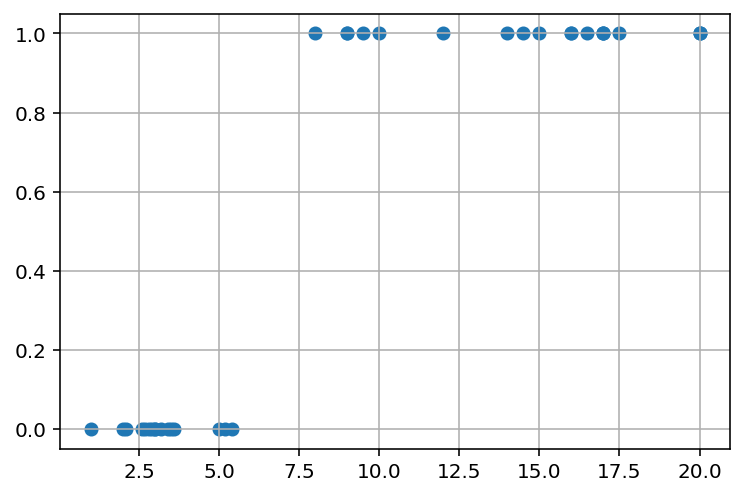

In [ ]:
# 시각화
plt.scatter(X, y)
plt.grid()

In [ ]:
# 모델학습
model = LogisticRegression()
model.fit(X.reshape(-1,1), y)
print(model.coef_, model.intercept_)

# 예측 분류
model.predict([[7,]])   # array([1]) -> 7시간은 합격

model.predict_proba([[7,]]) # array([[0.46974336, 0.53025664]]) 불합격할 확률, 합격할 확률


[[1.32952239]] [-9.1854821]


array([[0.46974336, 0.53025664]])

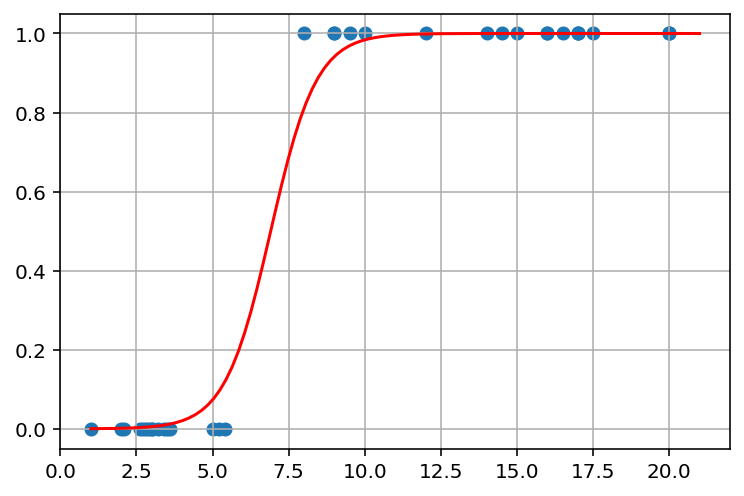

In [ ]:
# 모델시각화
def logreg(z):
  return 1 / (1 + np.exp(-z))

xx = np.linspace(1, 21, 100)
yy = logreg(model.coef_ * xx + model.intercept_)[0]
plt.plot(xx, yy, c='r')

plt.scatter(X, y)
plt.grid()

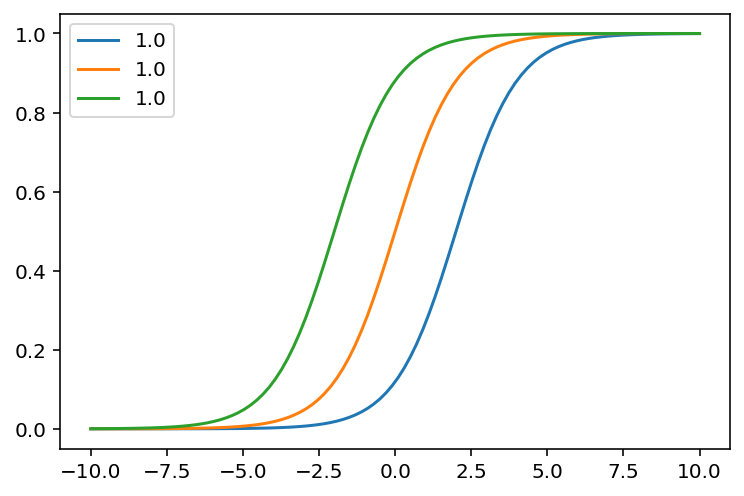

In [ ]:
# 가중치값, 절편을 바꿨을 때 변화
w_list = [1.0]   # 가중치  
b_list = [-2, 0, 2]          # 편향
xx = np.linspace(-10, 10, 100)
for w in w_list:
  for b in b_list:
    yy = logreg(w * xx + b)
    plt.plot(xx, yy, label = f'{w}')
plt.legend()
# 중심점은 그대로 있고, 기울기만 변화 (가중치에 따라)
# 기울기는 그대로 있고, 확률 변화(편향에 따라)

* 로지스틱회귀를 퍼셉트론 방식으로 표현

<center>
 <img src="https://thebook.io/img/080228/100.jpg" alt="퍼셉트론" width="40%" />

</center>
